In [ ]:
import tensorflow as tf

import scipy

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!rm -rf "sample_data/" "kfood50_imageSet/" # 파일 삭제하는 커맨드이므로 주의할 것!

In [ ]:
!unzip "/content/drive/MyDrive/AI_images/kfood50_imageSet.zip"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0058.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0040.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0050.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0060.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0022.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0098.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0034.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0067.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0011.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0057.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0008.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0079.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0076.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0025.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0010.jpg  
  inflating: kfood50_imageSet/test/어묵볶음/Img_086_0016.jpg  
  inflating: kfood50

In [ ]:
imgSet_path = 'kfood50_imageSet/'
train_path = imgSet_path + 'train/'
valid_path = imgSet_path + 'validation/'
test_path = imgSet_path + 'test/'

img_height = 224
img_width = 224
batch_size = 32;
# batch_size_train = 750
# batch_size_validation = 150
# batch_size_test = 100

In [ ]:
# Visualize Image
def plot_images(nRow,nCol,img):
    fig = plt.figure()
    fig,ax = plt.subplots(nRow,nCol,figsize=(nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i,j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j])

In [ ]:
datagen = ImageDataGenerator(rescale=1./ 255)
train_datagen = ImageDataGenerator(
                    rescale=1./ 255,
                    rotation_range=20,
                    horizontal_flip=True,
                )

train_generator = train_datagen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = datagen.flow_from_directory(
    valid_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

test_generator = datagen.flow_from_directory(
    test_path,
    shuffle=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 37500 images belonging to 50 classes.
Found 7500 images belonging to 50 classes.
Found 5000 images belonging to 50 classes.


In [ ]:
##### 음식 레이블 json 형식으로 저장
import json

# 음식 레이블 저장
class_dict = test_generator.class_indices
print(type(class_dict)) # dict {음식이름 : 음식분류번호}
print(class_dict.keys()) # 음식 이름 확인
print('클래스 개수 : ', len(class_dict.keys()))

# JSON 형식으로 저장
jsonfile_name = "food_classes.json"
rev_class_dict = {v : k for k, v in class_dict.items()}
with open(jsonfile_name, "w", encoding="utf-8") as json_file:
    json.dump(rev_class_dict, json_file, ensure_ascii=False)

<class 'dict'>
dict_keys(['고사리나물무침', '달걀국', '닭개장', '삼겹살구이', '소고기무국', '숙주나물무침', '시금치나물무침', '시래기된장국', '훈제오리', '갈비탕', '갈치구이', '감자조림', '감자탕', '건새우볶음', '고등어구이', '김치볶음밥', '김치찌개', '누룽지', '동태찌개', '된장찌개', '두부김치', '두부조림', '떡갈비', '떡볶이', '멸치볶음', '물냉면', '미역국', '북엇국', '비빔냉면', '비빔밥', '삼계탕', '새우볶음밥', '새우튀김', '소세지볶음', '순두부찌개', '알밥', '애호박볶음', '어묵볶음', '오징어튀김', '유부초밥', '육개장', '잡곡밥', '제육볶음', '주꾸미볶음', '짜장면', '짬뽕', '쫄면', '칼국수', '콩나물국', '황태구이'])
클래스 개수 :  50


In [ ]:
!cp $jsonfile_name /content/drive/MyDrive/importFiles/$jsonfile_name

In [ ]:
# json 파일 오픈 확인
import json

jsonfile_path = '/content/drive/MyDrive/importFiles/'
jsonfile_name = "food_classes.json"
with open(jsonfile_path+jsonfile_name, "r", encoding="utf-8") as json_file:
    jsonDict = json.load(json_file)

print(type(list(jsonDict.keys())[0]), type(list(jsonDict.values())[0]))

for k, v in jsonDict.items():
    k = int(k)
    print (k, v)

<class 'str'> <class 'str'>
0 고사리나물무침
1 달걀국
2 닭개장
3 삼겹살구이
4 소고기무국
5 숙주나물무침
6 시금치나물무침
7 시래기된장국
8 훈제오리
9 갈비탕
10 갈치구이
11 감자조림
12 감자탕
13 건새우볶음
14 고등어구이
15 김치볶음밥
16 김치찌개
17 누룽지
18 동태찌개
19 된장찌개
20 두부김치
21 두부조림
22 떡갈비
23 떡볶이
24 멸치볶음
25 물냉면
26 미역국
27 북엇국
28 비빔냉면
29 비빔밥
30 삼계탕
31 새우볶음밥
32 새우튀김
33 소세지볶음
34 순두부찌개
35 알밥
36 애호박볶음
37 어묵볶음
38 오징어튀김
39 유부초밥
40 육개장
41 잡곡밥
42 제육볶음
43 주꾸미볶음
44 짜장면
45 짬뽕
46 쫄면
47 칼국수
48 콩나물국
49 황태구이


## EfficientNetV2B3 모델 활용
https://keras.io/api/applications/efficientnet_v2/#efficientnetv2b3-function

In [ ]:
from keras.applications import EfficientNetB0
from keras.layers import Dense, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization, Dropout
from keras.models import Model
from keras.optimizers import Adam


def create_model() :

    num_classes = 50 # 음식 종류 50가지

    # EfficientNetB0 모델 가져오기 (가중치는 'imagenet' 사용)
    # base_model = EfficientNetB0(
    #                 weights='imagenet', 
    #                 include_top=False, 
    #                 input_shape=(224, 224, 3),
    #                 pooling='avg',
    #             )
    
    # 모델 가중치 사용 X
    base_model = EfficientNetB0(
                    weights=None, 
                    include_top=False, 
                    input_shape=(224, 224, 3),
                    pooling='avg',
                )

    # 모델 아키텍처에 맞게 새로운 분류 레이어 추가하기
    x = base_model.output
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    output = Dense(num_classes, activation='softmax')(x)

    # 전체 모델 구성
    model = Model(inputs=base_model.input, outputs=output)

    # 기존 가중치 동결
    # for layer in base_model.layers:
    #     layer.trainable = False

    # 모델 컴파일
    model.compile(optimizer=Adam(lr=0.001), 
                  loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [ ]:
model = create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0]']      

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


                                                                  'block3a_project_bn[0][0]']     
                                                                                                  
 block4a_expand_conv (Conv2D)   (None, 28, 28, 240)  9600        ['block3b_add[0][0]']            
                                                                                                  
 block4a_expand_bn (BatchNormal  (None, 28, 28, 240)  960        ['block4a_expand_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 block4a_expand_activation (Act  (None, 28, 28, 240)  0          ['block4a_expand_bn[0][0]']      
 ivation)                                                                                         
                                                                                                  
 block4a_d

In [ ]:
history = model.fit(
    train_generator,  # 학습 데이터 제네레이터
    epochs=10,  # 학습 에포크 수
    verbose=1,
    validation_data=valid_generator,  # 검증 데이터 제네레이터
)

Epoch 1/10
1172/1172 [==============================] - 781s 651ms/step - loss: 3.9566 - accuracy: 0.0741 - val_loss: 5.3030 - val_accuracy: 0.0233
Epoch 2/10
1172/1172 [==============================] - 769s 656ms/step - loss: 3.7616 - accuracy: 0.0909 - val_loss: 5.2939 - val_accuracy: 0.1139
Epoch 3/10
1172/1172 [==============================] - 772s 659ms/step - loss: 3.3945 - accuracy: 0.1408 - val_loss: 3.0946 - val_accuracy: 0.1652
Epoch 4/10
1172/1172 [==============================] - 728s 620ms/step - loss: 3.3712 - accuracy: 0.1445 - val_loss: 10.0679 - val_accuracy: 0.1149
Epoch 5/10
1172/1172 [==============================] - 730s 623ms/step - loss: 3.0992 - accuracy: 0.1842 - val_loss: 2.7823 - val_accuracy: 0.2213
Epoch 6/10
1172/1172 [==============================] - 732s 625ms/step - loss: 2.7198 - accuracy: 0.2399 - val_loss: 2.5688 - val_accuracy: 0.2696
Epoch 7/10
1172/1172 [==============================] - 727s 620ms/step - loss: 2.4531 - accuracy: 0.2954 - val

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-086bdd50a62e>", line 1, in <cell line: 1>
    history = model.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/engine/training.py", line 1685, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py", line 894, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_f

TypeError: ignored

Text(0.5, 1.0, 'Loss Curves')

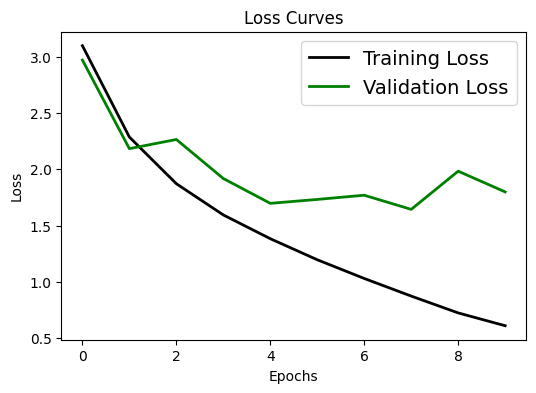

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

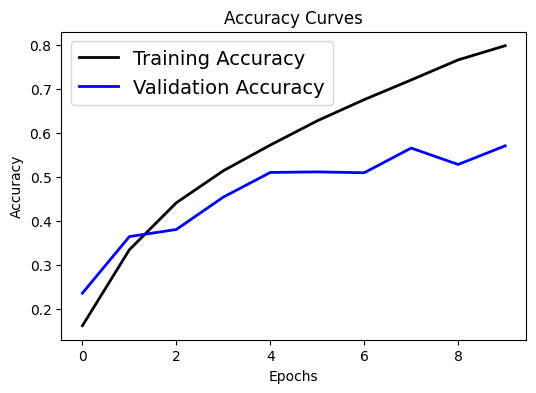

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [ ]:
modelFile = 'EfficientNetB0-32-10' # modelName-batch_size-epochs
model.save(modelFile)

!cp $modelFile /content/drive/MyDrive/Models/$modelFile

In [ ]:
# 5 epochs 추가 학습
model.fit_generator(
    train_generator,  # 학습 데이터 제네레이터
    steps_per_epoch=len(train_generator),  # 에포크 당 스텝 수
    epochs=5,  # 학습 에포크 수
    validation_data=valid_generator,  # 검증 데이터 제네레이터
    validation_steps=len(valid_generator)  # 검증 스텝 수
)

<ipython-input-22-b4d18b3cad92>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/5
1172/1172 [==============================] - 265s 226ms/step - loss: 0.6555 - accuracy: 0.7897 - val_loss: 1.2622 - val_accuracy: 0.6647
Epoch 2/5
1172/1172 [==============================] - 263s 225ms/step - loss: 0.6363 - accuracy: 0.7971 - val_loss: 1.3115 - val_accuracy: 0.6523
Epoch 3/5
1172/1172 [==============================] - 263s 225ms/step - loss: 0.6186 - accuracy: 0.8028 - val_loss: 1.3142 - val_accuracy: 0.6541
Epoch 4/5
1172/1172 [==============================] - 264s 225ms/step - loss: 0.6020 - accuracy: 0.8042 - val_loss: 1.3338 - val_accuracy: 0.6544
Epoch 5/5
1172/1172 [==============================] - 267s 228ms/step - loss: 0.5892 - accuracy: 0.8083 - val_loss: 1.3057 - val_accuracy: 0.6675


In [ ]:
modelFile = 'mobileNet-32-15.h5'
model.save(modelFile)

!cp $modelFile /content/drive/MyDrive/Models/$modelFile

In [ ]:
# 예측 결과 얻기
predictions = model.predict(test_generator)

# 예측 결과 출력
predicted_labels = np.argmax(predictions, axis=1)  # 가장 높은 확률을 가진 클래스의 인덱스 추출
class_labels = list(test_generator.class_indices.keys())  # 클래스 라벨 목록
for i, label_idx in enumerate(predicted_labels):
    label = class_labels[label_idx]
    print(f"Image {i+1}: Predicted label - {label}")

In [ ]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
modelFile = 'mobileNet-32-10.h5'
new_model = tf.keras.models.load_model(modelFile)

loss, acc = new_model.evaluate(test_generator, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

157/157 - 40s - loss: 1.0956 - accuracy: 0.7000 - 40s/epoch - 253ms/step
복원된 모델의 정확도: 70.00%


In [ ]:
# 가중치와 옵티마이저를 포함하여 정확히 동일한 모델을 다시 생성합니다
modelFile = 'mobileNet-32-15.h5'
new_model = tf.keras.models.load_model(modelFile)

loss, acc = new_model.evaluate(test_generator, verbose=2)
print('복원된 모델의 정확도: {:5.2f}%'.format(100*acc))

157/157 - 44s - loss: 1.0697 - accuracy: 0.7156 - 44s/epoch - 283ms/step
복원된 모델의 정확도: 71.56%


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

modelFile = 'mobileNet-32-15.h5'
model = tf.keras.models.load_model(modelFile)

class_labels = list(test_generator.class_indices.keys())
test_results = np.argmax(model.predict(test_generator),axis=1)
test_labels = np.array(test_generator.labels)
print(test_results.shape, test_labels.shape)

157/157 [==============================] - 38s 240ms/step
(5000,) (5000,)


In [ ]:
cf_matrix = confusion_matrix(test_results, test_labels)

plt.figure(figsize=(12,10))
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt='.2%',cmap='Blues')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Object Category')
ax.set_ylabel('Actual Object Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

## Display the visualization of the Confusion Matrix.
plt.show()

accuracy = np.trace(cf_matrix)/len(test_labels)
print('\nAccuracy: {:.2f}\n'.format(accuracy))